In [8]:
# Reference: https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/
import tensorflow
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

tf.__version__

'2.8.0'

# Data Generation

In [16]:
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=2, random_state=2)
    # split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
    return X_train, y_train, X_test, y_test

In [17]:
# prepare dataset
X_train, y_train, X_test, y_test = prepare_data()

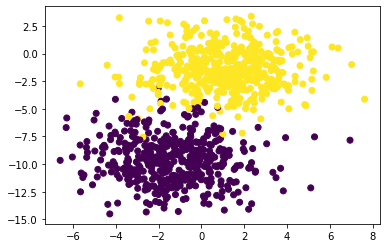

In [19]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train)

# Model

In [23]:
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_test, y_test, lr):
    
    # define model
    model = Sequential()
    model.add(layers.Dense(50, input_dim=2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # compile model
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('lr='+str(lr), pad=-50)

## Evaluating Learning Rates Impact

In [35]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]

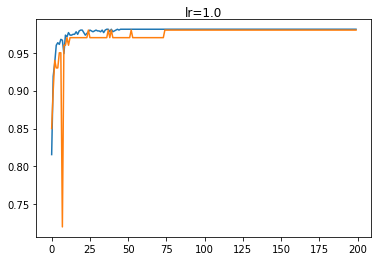

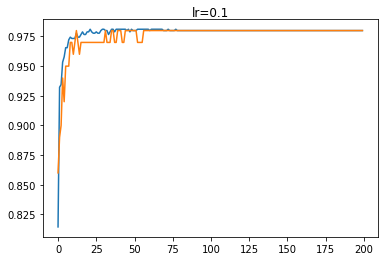

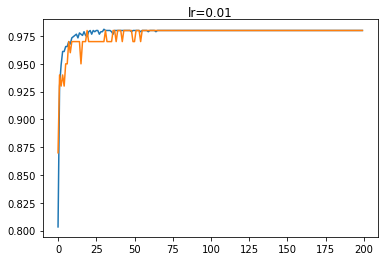

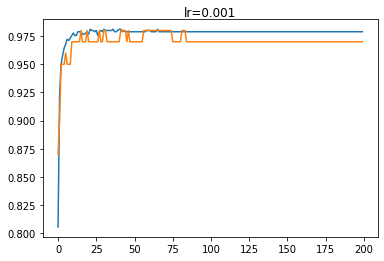

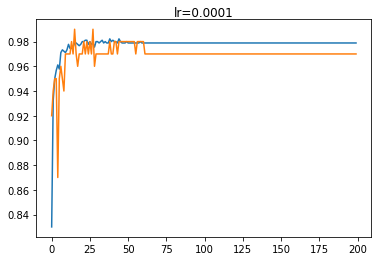

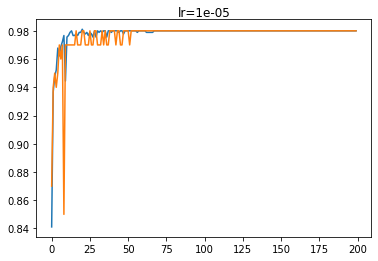

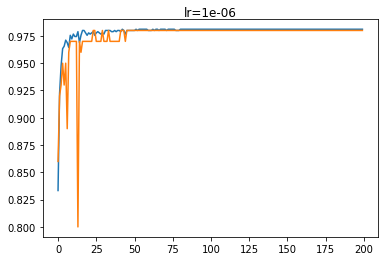

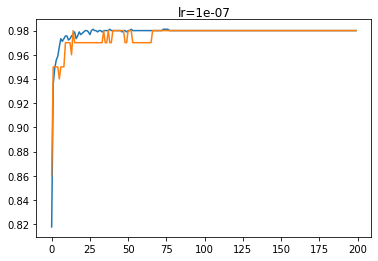

In [36]:
for i in range(len(learning_rates)):
    fit_model(X_train, y_train, X_test, y_test, learning_rates[i])
    # show learning curves
    plt.show()

# Time-Based Learning Rate Schedule

The stochastic gradient descent optimization algorithm implementation in the SGD class has an argument called decay. This argument is used in the time-based learning rate decay schedule equation as follows:

LearningRate = LearningRate * 1/(1 + decay * epoch)

If we use the initial learning rate value of 0.1 and the decay of 0.001, the first 5 epochs will adapt the learning rate as follows:

Reference: https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/


In [37]:
epoch = 1
LearningRate = 0.1
decay = 0.001

print('Epoch Learning Rate')

while epoch < 10:
    print('{} {}'.format(epoch, LearningRate) )          
    LearningRate = LearningRate * 1/(1 + decay * epoch)    
    epoch += 1

Epoch Learning Rate
1 0.1
2 0.09990009990009992
3 0.09970069850309372
4 0.09940249103000372
5 0.09900646516932642
6 0.09851389569087207
7 0.09792633766488278
8 0.09724561833652709
9 0.09647382771480863


In [39]:
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_test, y_test, lr, decay_rate = 0.01):
    
    epochs = 200
    
    # define model
    model = Sequential()
    model.add(layers.Dense(50, input_dim=2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # compile model
    opt = tf.keras.optimizers.SGD(learning_rate=lr, decay=decay_rate)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('lr='+str(lr), pad=-50)

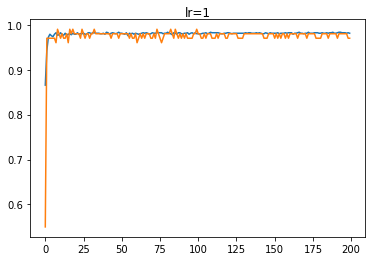

In [40]:
lr=1
decay_rate = 0.01
fit_model(X_train, y_train, X_test, y_test, lr, decay_rate)
# show learning curves
plt.show()

# Drop-Based Learning Rate Schedule

Another popular learning rate schedule used with deep learning models is to systematically drop the learning rate at specific times during training. This method is implemented by dropping the learning rate by half every fixed number of epochs.

A new step_decay() function is defined that implements the equation:

LearningRate = InitialLearningRate * DropRate^floor(Epoch / EpochDrop)

Reference: https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/

In [41]:
from tensorflow.keras.callbacks import LearningRateScheduler

In [42]:
# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate
 

In [43]:
import math
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_test, y_test, lr):
    
    epochs = 200
    
    # define model
    model = Sequential()
    model.add(layers.Dense(50, input_dim=2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # compile model
    opt = tf.keras.optimizers.SGD(learning_rate=lr)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    # learning schedule callback
    lrate = LearningRateScheduler(step_decay)
    callbacks_list = [lrate]

    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, callbacks=callbacks_list, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('lr='+str(lr), pad=-50)

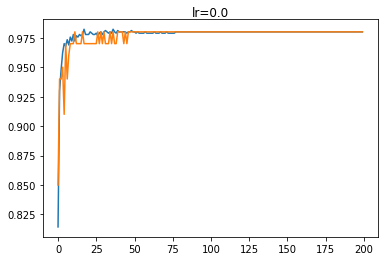

In [34]:
lr=0.0 # not used
fit_model(X_train, y_train, X_test, y_test, lr)
# show learning curves
plt.show()